# Data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1hE-XvGz0-AChRUazHiAu1ilheRvMEh9xBG3mCaWMXEo/export?format=csv')
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,44.998.427,44.998.427,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,44.998.427,44.998.427,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,44.998.427,44.998.427,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,44.998.427,44.998.427,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,44.998.427,44.998.427,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,951.950.142,951.950.142,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,1.045.814.322,1.045.814.322,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,1.288.941.789,1.288.941.789,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,1.834.409.265,1.834.409.265,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [2]:
countries = df['Country'].unique()

<Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>

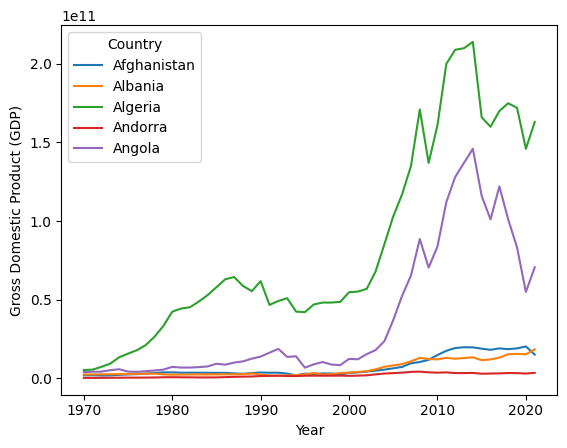

In [3]:
import seaborn as sns
df_line =df[df['Country'].isin(countries[0:5])]
df_line
sns.lineplot(data=df_line,x='Year',y='Gross Domestic Product (GDP)',hue='Country')

<Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>

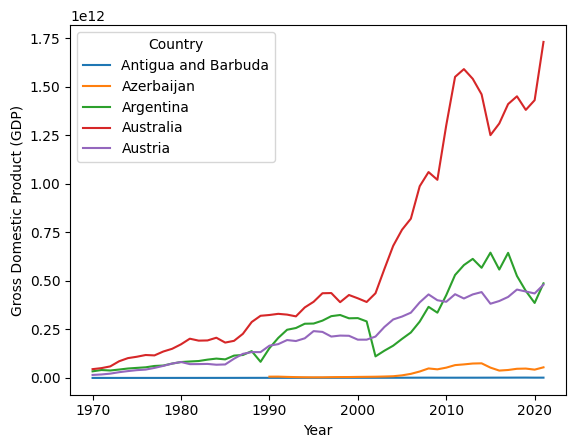

In [4]:
df_line =df[df['Country'].isin(countries[5:10])]
df_line
sns.lineplot(data=df_line,x='Year',y='Gross Domestic Product (GDP)',hue='Country')

<Axes: title={'center': 'Australia'}, xlabel='Year', ylabel='value'>

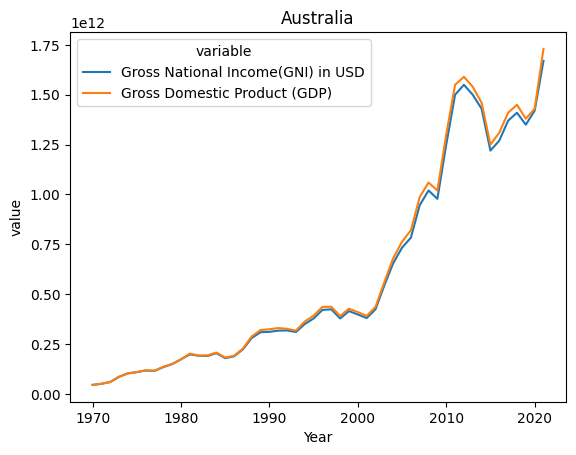

In [5]:
country ='Australia'
df_line =df[df['Country']==country]
variables = ['Year','Gross National Income(GNI) in USD','Gross Domestic Product (GDP)',]
df_melted = pd.melt(df_line, id_vars=['Year'], value_vars=variables[1:])
plt.title(country)
sns.lineplot(data=df_melted,x='Year',y='value',hue='variable')

<Axes: title={'center': 'Australia: GNI per capita vs Population'}, xlabel='Per capita GNI', ylabel='Gross National Income(GNI) in USD'>

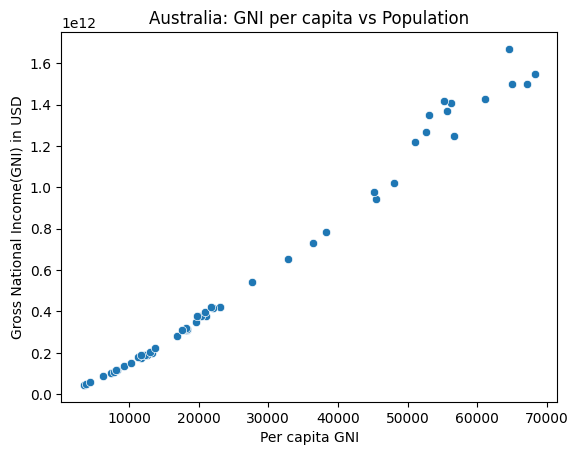

In [6]:
plt.title(f'{country}: GNI per capita vs Population')
sns.scatterplot(data=df_line,x='Per capita GNI',y='Gross National Income(GNI) in USD')

<Axes: title={'center': 'Australia,2020: Imports & Exports'}, xlabel='Category', ylabel='Ammount'>

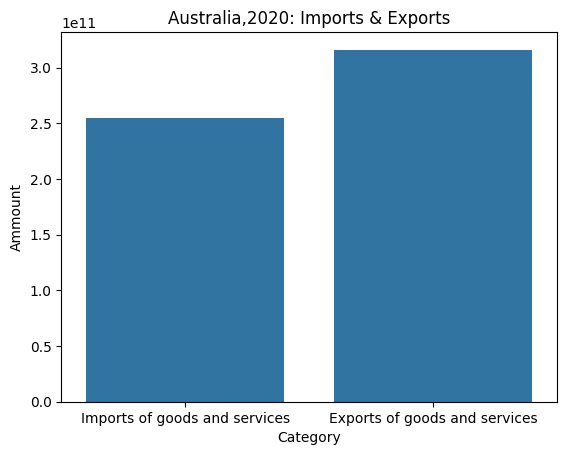

In [7]:
year = 2020
plt.title(f'{country},{year}: Imports & Exports')
df_bar = df_line[df_line['Year']==year]
df_bar_melted = pd.melt(df_bar, id_vars=['Year'], value_vars=['Imports of goods and services', 'Exports of goods and services'], var_name='Category', value_name='Ammount')
sns.barplot(data=df_bar_melted, x='Category', y='Ammount')
#sns.barplot(data=df_bar,x='Year',y=['Imports of goods and services','Exports of goods and services'])

<Axes: title={'center': 'Australia: Manufacturing vs total value addded'}, xlabel='Manufacturing (ISIC D)', ylabel='Total Value Added'>

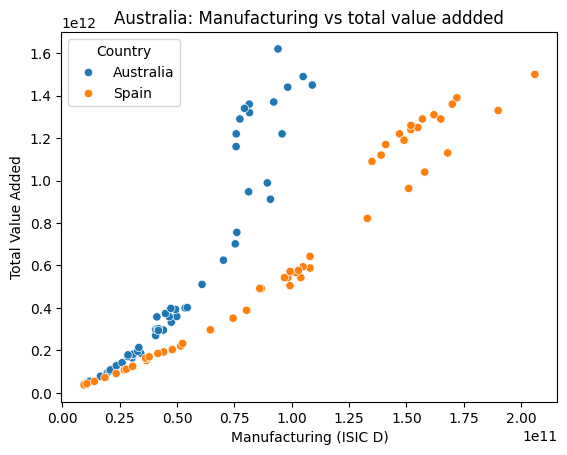

In [8]:
plt.title(f'{country}: Manufacturing vs total value addded')
df_scatter = df[df['Country'].isin(['Australia','Spain'])]
sns.scatterplot(data=df_scatter,x='Manufacturing (ISIC D)',y='Total Value Added',hue='Country')

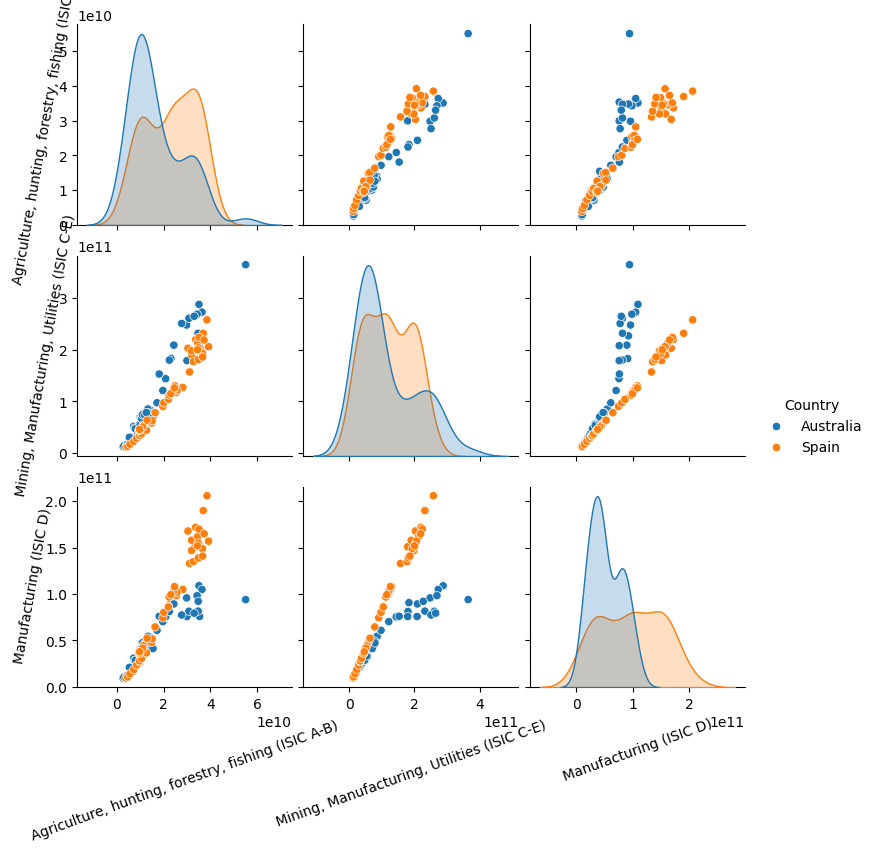

In [9]:
variables = ['Country',' Agriculture, hunting, forestry, fishing (ISIC A-B) ',' Mining, Manufacturing, Utilities (ISIC C-E) ','Manufacturing (ISIC D)']
g = sns.pairplot(data=df_scatter[variables],hue='Country')
for ax in g.axes.flatten():
  ax.set_xlabel(ax.get_xlabel(), rotation=20)
  ax.set_ylabel(ax.get_ylabel(), rotation=80)
plt.show()

C:\Users\aland\AppData\Local\Temp\ipykernel_12808\491066970.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bar2 = df_bar2[df['Country'].isin(countries[0:20])]


<Axes: title={'center': 'GDP in 2021'}, xlabel='Gross Domestic Product (GDP)', ylabel='Country'>

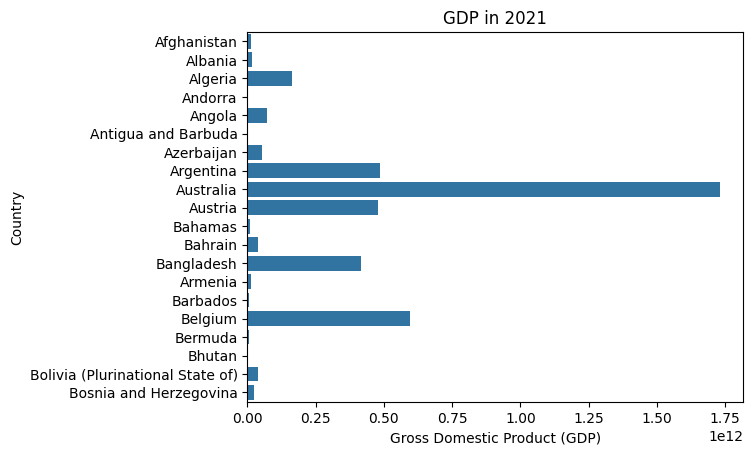

In [10]:
year = 2021
df_bar2 = df[df['Year']==year]
df_bar2 = df_bar2[df['Country'].isin(countries[0:20])]
plt.title(f'GDP in {year}')
sns.barplot(data=df_bar2,y='Country',x='Gross Domestic Product (GDP)')